In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import datetime as dt

In [2]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [3]:
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [4]:
# reflect an existing database into a new model
base = automap_base()
# reflect the tables
base.prepare(engine, reflect = True)

In [5]:
# We can view all of the classes that automap found
base.classes.keys()

['measurement', 'station']

In [6]:
# Save references to each table
Station = base.classes.measurement
Measurement = base.classes.measurement

In [7]:
# Create our session (link) from Python to the DB
session = Session(engine)

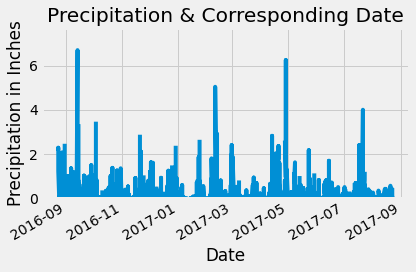

In [8]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results
session.query(Measurement.date).order_by(Measurement.date.desc())
date0 = session.query(Measurement.date).order_by(Measurement.date.desc()).first()
date0 = date0[0]
# Calculate the date 1 year ago from the last data point in the database
yearminus1 = dt.datetime.strptime(date0, "%Y-%m-%d") - dt.timedelta(days=365)
# Perform a query to retrieve the data and precipitation scores
query0 = session.query( Measurement.date , Measurement.prcp).filter(Measurement.date>=yearminus1).all()
# Save the query results as a Pandas DataFrame and set the index to the date column
results0 = pd.DataFrame(query0, columns = ["Date","Precipitation"])
results0["Date"] = pd.to_datetime(results0["Date"], format = "%Y-%m-%d" )
results0.set_index("Date", inplace = True)
# Sort the dataframe by date
results1 = results0.sort_values(by="Date", ascending = True)
# Use Pandas Plotting with Matplotlib to plot the data
results1.plot(legend=None)
plt.ylim(0,max(results1["Precipitation"])+1)
plt.ylabel("Precipitation in Inches")
plt.title("Precipitation & Corresponding Date")
plt.tight_layout()
plt.show()

In [9]:
# Use Pandas to calcualte the summary statistics for the precipitation data
stats0 = results1.describe()
stats0

,Precipitation
count,2015.000000
mean,0.176462
std,0.460288
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


In [10]:
# Design a query to show how many stations are available in this dataset?
stations0 = session.query(Measurement.station).distinct()
stations1 = stations0.count()
stations1

9

In [11]:
# What are the most active stations? (i.e. what stations have the most rows)?
# List the stations and the counts in descending order.
active0 = session.query(Measurement.station, func.count(Measurement.station))
active1 = active0.group_by(Measurement.station)
active2 = active1.order_by(func.count(Measurement.station).desc()).all()
active2

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [12]:
# Using the station id from the previous query, calculate the lowest temperature recorded, 
# highest temperature recorded, and average temperature of the most active station?
temperatures0 = [func.min(Measurement.tobs),
                func.max(Measurement.tobs),
                func.avg(Measurement.tobs)
                ]
temperatures1 = session.query(*temperatures0).filter(Measurement.station == active2[0][0]).all()
temperatures1

[(54.0, 85.0, 71.66378066378067)]

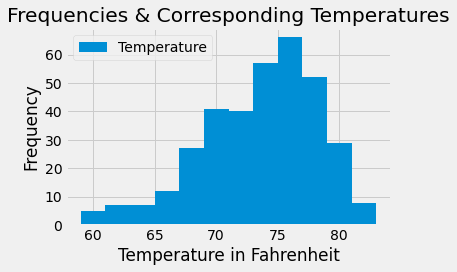

In [13]:
# Choose the station with the highest number of temperature observations.
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
frequency0 = session.query(Measurement.tobs)
frequency1 = frequency0.filter(Measurement.date >= yearminus1)
frequency2 = frequency1.filter(Measurement.station == active2[0][0])
frequency3 = frequency2.order_by(Measurement.date).all()
histogram0 = pd.DataFrame(frequency3, columns = ["Temperature"])
histogram0.plot.hist(bins=12)
plt.xlabel("Temperature in Fahrenheit")
plt.title("Frequencies & Corresponding Temperatures")
plt.tight_layout()
plt.show()